# Neural Network Classifier

In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.callbacks import Callback
from keras.models import Model
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Convolution2D
from keras.layers.core import Lambda
from keras.applications.inception_v3 import preprocess_input
from keras.layers import GlobalAveragePooling2D 
from keras.applications.xception import Xception
from keras.callbacks import EarlyStopping
import tensorflow as tf
import cv2
import tqdm
import pickle
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import random

import glob
import matplotlib.image as mpimg
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

np.random.seed(12)

image_shape = (64, 64, 3)
n_classes = 1

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def extract_image_features(imgs):
    features = []
    for file in imgs:
        # Read in each one by one
        img = mpimg.imread(file)
        img = cv2.resize(img, (64, 64))
        features.append(np.asanyarray(img * 255.0, dtype=np.uint8))
    return features
### Define your architecture here.
### Feel free to use as many code cells as needed.
def roadSignNet():
    model_ = Sequential()

    model_.add(Conv2D(32, (3, 3), padding='same', input_shape=image_shape, activation='relu'))
    model_.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Flatten())
    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(n_classes))
    model_.add(Activation('sigmoid'))
    return model_

In [3]:
cars = []
notcars = []
cars = glob.glob('./data/vehicles/GTI_Far/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_Left/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_MiddleClose/*.png')
cars = cars + glob.glob('./data/vehicles/GTI_Right/*.png')
cars = cars + glob.glob('./data/vehicles/KITTI_extracted/*.png')
notcars = notcars + glob.glob('./data/non-vehicles/GTI/*.png')
notcars = notcars + glob.glob('./data/non-vehicles/Extras/*.png')

features = extract_image_features(cars + notcars)
n_features = len(features)

for i in range(n_features):
    features.append(cv2.flip(features[i], 1))

y = np.hstack(( np.ones(len(cars)), np.zeros(len(notcars)), np.ones(len(cars)), np.zeros(len(notcars)) ))

features = np.asarray(features)

'''
y = np.asarray(y, dtype=np.uint8)

y_onehot = np.zeros((y.shape[0], n_classes), dtype=np.uint8)
for i in range(y.shape[0]):
    y_onehot[i][y[i]] = 1
    
y = y_onehot
'''
s_count = 10
while s_count > 0:
    features, y = shuffle(features, y)
    s_count = s_count - 1
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2)

In [4]:
y

array([ 0.,  0.,  1., ...,  0.,  0.,  1.])

In [5]:
model_complicate = roadSignNet()
model_complicate.summary()
model_complicate.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
h = model_complicate.fit(X_train, y_train, batch_size=32, epochs=10)
model_complicate.save_weights('w_nn.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
__________

I  [ 0.]  am sure this is a  non-car


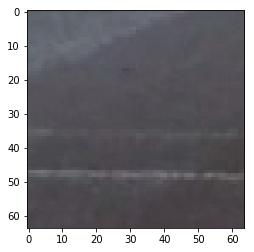

I  [ 0.]  am sure this is a  non-car


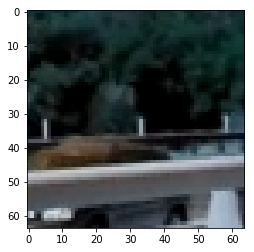

I  [ 1.]  am sure this is a  car


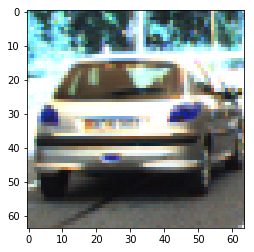

I  [ 0.]  am sure this is a  non-car


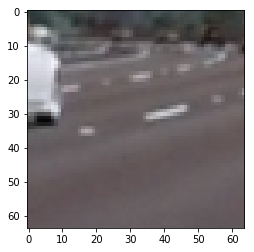

I  [  2.35920926e-29]  am sure this is a  non-car


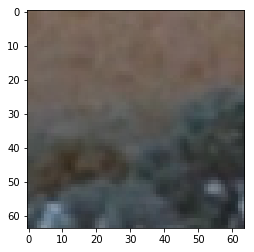

I  [ 1.]  am sure this is a  car


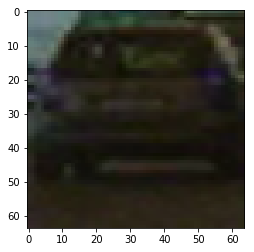

I  [ 0.]  am sure this is a  non-car


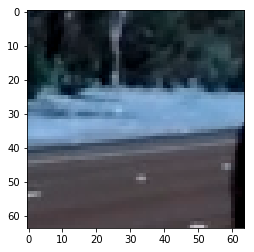

I  [  2.36054210e-36]  am sure this is a  non-car


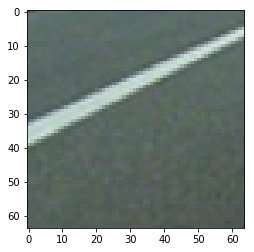

I  [  7.53878675e-38]  am sure this is a  non-car


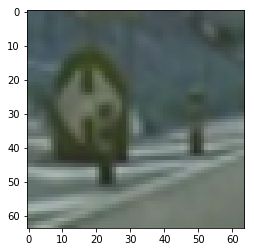

I  [ 0.]  am sure this is a  non-car


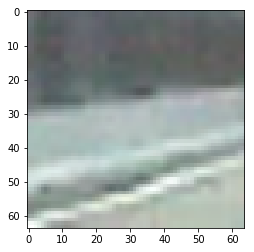

I  [ 1.]  am sure this is a  car


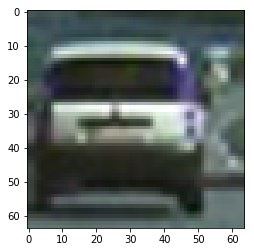

I  [ 0.]  am sure this is a  non-car


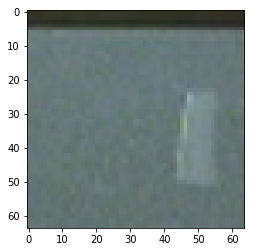

In [6]:
y_pred = model_complicate.predict(X_test, batch_size=32)
index = np.argmax(y_pred[0])
n_test = y_test.shape[0]
SignName = {0:'non-car', 1:'car'}
for i in range(12):
    random_index = random.randint(0, n_test - 1)
    index = 1 if y_pred[random_index] > 0.5 else 0
    print('I ', y_pred[random_index], ' am sure this is a ', SignName[index])
    plt.imshow(X_test[random_index][:,:,::-1])
    plt.show()